<a href="https://colab.research.google.com/github/soiqualang/colab/blob/master/readHDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pwd

/content


In [0]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

In [0]:
gdal_dataset = gdal.Open ("/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf")

In [0]:
gdal_dataset.GetSubDatasets()

[('HDF4_EOS:EOS_GRID:"/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf":MODIS_Grid_8Day_1km_LST:LST_Day_1km',
  '[1200x1200] LST_Day_1km MODIS_Grid_8Day_1km_LST (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf":MODIS_Grid_8Day_1km_LST:QC_Day',
  '[1200x1200] QC_Day MODIS_Grid_8Day_1km_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf":MODIS_Grid_8Day_1km_LST:Day_view_time',
  '[1200x1200] Day_view_time MODIS_Grid_8Day_1km_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf":MODIS_Grid_8Day_1km_LST:Day_view_angl',
  '[1200x1200] Day_view_angl MODIS_Grid_8Day_1km_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf":MODIS_Grid_8Day_1km_LST:LST_Night_1km',
  '[1200x1200] LST_Night_1km MODI

In [0]:
lc_data=gdal.Open('HDF4_EOS:EOS_GRID:"/soiqualang/pygeo/data/MOD11A2.A2013001.h28v07.005.2013017015136.hdf":MODIS_Grid_8Day_1km_LST:Clear_sky_days')

In [0]:
lc=lc_data.ReadAsArray()

In [0]:
(lc.nbytes/(8*1024*1024.))

0.171661376953125

In [0]:
print(lc)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
(lc.min(), lc.max(), lc.mean(), lc.std())

(0, 255, 16.687774305555557, 46.564385851195986)

In [0]:
passer = np.logical_and ( lc > 0, lc <= 255)

In [0]:
(lc[passer].min(), lc[passer].max(), lc[passer].mean(), lc[passer].std())

(1, 255, 52.718119553866806, 70.35774080023769)

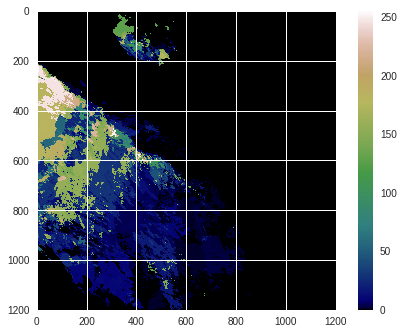

In [0]:
plt.imshow ( lc, interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth)
plt.colorbar()